In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tarak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data = pd.read_csv('Corona_NLP_test.csv')
# Preprocessing
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex
data['OriginalTweet'] = data['OriginalTweet'].str.lower()
data = data[data['OriginalTweet'].notna() & data['OriginalTweet'] != ""]
print(data)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     trending new yorkers encounter empty supermark...  Extremely Negative  
1     when i couldnt find hand sanitizer at fred mey...            Positive  
2     fin

C:\Users\tarak\AppData\Local\Temp\ipykernel_684\3111441267.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"http\S+", "")
C:\Users\tarak\AppData\Local\Temp\ipykernel_684\3111441267.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"@\S+", "")
C:\Users\tarak\AppData\Local\Temp\ipykernel_684\3111441267.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['OriginalTweet'] = data['OriginalTweet'].str.replace(r"[^a-zA-Z0-9\s]", "") # Updated regex


In [23]:
# Save cleaned data to a new CSV file
data.to_csv("Cleaned_Corona_NLP_test.csv", index=False)
     

data = pd.read_csv("Cleaned_Corona_NLP_test.csv")

# a) Convert the text corpus into tokens.

In [14]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import pandas as pd
# Tokenization
#a) Converting the text corpus into tokens.
data = pd.read_csv('Corona_NLP_test.csv')
data['tokens'] = data['OriginalTweet'].apply(word_tokenize)
print(data['tokens']) 

0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [When, I, could, n't, find, hand, sanitizer, a...
2       [Find, out, how, you, can, protect, yourself, ...
3       [#, Panic, buying, hits, #, NewYork, City, as,...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, In, A, Supermarket, in, Israel, --...
3794    [Did, you, panic, buy, a, lot, of, non-perisha...
3795    [Asst, Prof, of, Economics, @, cconces, was, o...
3796    [Gov, need, to, do, somethings, instead, of, b...
3797    [I, and, @, ForestandPaper, members, are, comm...
Name: tokens, Length: 3798, dtype: object


# b) Perform stop word removal.

In [15]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['tokens_no_stopwords'] = data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])
print(data['tokens_no_stopwords'])

0       [TRENDING, :, New, Yorkers, encounter, empty, ...
1       [When, I, could, n't, find, hand, sanitizer, F...
2       [Find, protect, loved, ones, #, coronavirus, ....
3       [#, Panic, buying, hits, #, NewYork, City, anx...
4       [#, toiletpaper, #, dunnypaper, #, coronavirus...
                              ...                        
3793    [Meanwhile, In, A, Supermarket, Israel, --, Pe...
3794    [Did, panic, buy, lot, non-perishable, items, ...
3795    [Asst, Prof, Economics, @, cconces, @, NBCPhil...
3796    [Gov, need, somethings, instead, biar, je, rak...
3797    [I, @, ForestandPaper, members, committed, saf...
Name: tokens_no_stopwords, Length: 3798, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# c) Count Word frequencies

In [16]:
from collections import Counter

# Concatenate all the tweets into a single string
text = " ".join(data["OriginalTweet"].values)

# Split the string into words
words = text.split()

# Count the word frequencies using Counter
word_freq = Counter(words)

# Print the top 10 most frequent words
for word, freq in word_freq.most_common(10):
    print(word, freq)

the 3848
to 3655
and 2337
of 2035
a 1706
in 1685
#Covid_19 1383
for 1277
is 1245
I 1070


# d) Create word clouds.

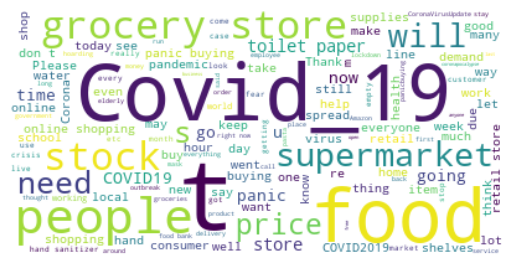

In [19]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


# Load the dataset
data = pd.read_csv('Corona_NLP_test.csv')

# Concatenate all the tweets into a single string
text = " ".join(tweet for tweet in data['OriginalTweet'])

# Create a set of stopwords
stopwords = set(STOPWORDS)
stopwords.update(["co", "https", "amp", "coronavirus", "COVID", "19", "Covid", "covid"])

# Create a word cloud
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
